In [2]:
import scprep.run.splatter as splatter
import scprep
import phate

Be sure to install R! Then you can run the below cell

Code below is modified from [this Google collab](https://colab.research.google.com/github/KrishnaswamyLab/SingleCellWorkshop/blob/master/exercises/Dimensionality_Reduction/04_Simulated_Data.ipynb#scrollTo=Gtikx4XxzSaX)

In [3]:
# splatter.install() # commented because takes forever and I'm tired of running it accidentally

In [21]:
sim = scprep.run.SplatSimulate(method='paths', batch_cells=1000, n_genes=8000,
                               group_prob=[0.5, 0.5])
data_sim = scprep.normalize.library_size_normalize(sim['counts'])
data_sim = scprep.transform.sqrt(data_sim)

R[write to console]: Getting parameters...
R[write to console]: Creating simulation object...
R[write to console]: Simulating library sizes...
R[write to console]: Simulating gene means...
R[write to console]: Simulating path endpoints...
R[write to console]: Simulating path steps...
R[write to console]: Simulating BCV...
R[write to console]: Simulating counts...
R[write to console]: Simulating dropout (if needed)...
R[write to console]: Sparsifying assays...
R[write to console]: Automatically converting to sparse matrices, threshold = 0.95
R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'CellMeans': estimated sparse size 1.49 * dense matrix
R[write to console]: Skipping 'TrueCounts': estimated sparse size 1.81 * dense matrix
R[write to console]: Skippi

In [13]:
sim['group']

['Path2', 'Path1', 'Path2', 'Path2', 'Path2', ..., 'Path1', 'Path1', 'Path1', 'Path2', 'Path1']
Length: 1000
Categories (2, object): ['Path1', 'Path2']

In [22]:
phate_operator = phate.PHATE(k=15, t=100)
tree_phate = phate_operator.fit_transform(sim['counts'])

Calculating PHATE...
  Running PHATE on 1000 observations and 8000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.47 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 5.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.78 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.91 seconds.
Calculated PHATE in 8.77 seconds.


/home/daniel/Documents/programming/MIX/mix_venv/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

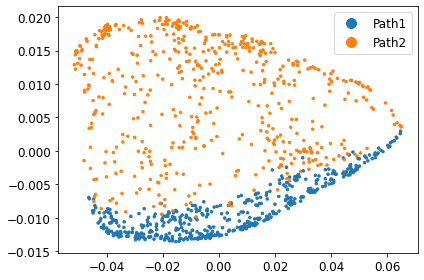

In [23]:
scprep.plot.scatter2d(tree_phate, c=sim['group'])